In [2]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [4]:

kwargs = {'num_workers': 1, 'pin_memory': True} if args.cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args.batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, 
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=args.batch_size, shuffle=True, **kwargs)

In [ ]:
train_set = [i for i in enumerate(train_loader)]

In [ ]:
train_set[45][1][1]
#After tinkering a lot with this variable I can figure out the strcuture
# train_set = ((1, batch1), (2, batch2), (3, batch3))
# batchX = ((X1, X2, X3, .. Xn), (Y1, Y2, Y3, ... Yn))  where n -> batch_size

In [ ]:
for i, (d, t) in enumerate(train_loader):
    if i > 2:
        break
    print(d.size())
    b = d.view(12, -1)
    print(b.size())
    print(t)

In [8]:
class Model0(nn.Module):
    
    def __init__(self):
        super(Model0, self).__init__()
        
        self.input_layer = nn.Linear(28*28, 100)
        self.output_layer = nn.Linear(100, 10)
        
    def forward(self, x):
        
        x = self.input_layer(x)
        x = self.output_layer(x)
        
        return F.log_softmax(x)

class Model1(nn.Module):
    
    def __init__(self):
        super(Model1, self).__init__()
        
        self.input_layer = nn.Linear(28*28, 100)
        
        self.hidden_layer = nn.Linear(100, 100)
        
        self.output_layer = nn.Linear(100, 10)
        
    def forward(self, x):
        
        x = self.input_layer(x)
        x = self.hidden_layer(x)
        x = self.output_layer(x)
        
        return F.log_softmax(x)

class Model2(nn.Module):
    
    def __init__(self):
        super(Model2, self).__init__()
        
        self.input_layer = nn.Linear(28*28, 100)

        self.hidden_layer = nn.Linear(100, 100)
        self.hidden_layer1 = nn.Linear(100, 100)
        
        self.output_layer = nn.Linear(100, 10)
        
    def forward(self, x):
        
        x = self.input_layer(x)
 
        x = self.hidden_layer(x)
        x = self.hidden_layer1(x)

        x = self.output_layer(x)

        
        return F.log_softmax(x)
    

class Model3(nn.Module):
    
    def __init__(self):
        super(Model3, self).__init__()
        
        self.input_layer = nn.Linear(28*28, 100)
        
        self.hidden_layer = nn.Linear(100, 100)
        self.hidden_layer1 = nn.Linear(100, 100)
        self.hidden_layer2 = nn.Linear(100, 100)

        self.output_layer = nn.Linear(100, 10)
        
        
    def forward(self, x):
        
        x = self.input_layer(x)
        
        x = self.hidden_layer(x)
        x = self.hidden_layer1(x)
        x = self.hidden_layer2(x)

        x = self.output_layer(x)

        
        return F.log_softmax(x)
    
       
    

In [11]:
models = Model0(), Model1(), Model2(), Model3() 
if args.cuda:
    for model in models:
        model.cuda()

In [10]:
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

NameError: name 'model' is not defined

In [12]:
def train(epoch, model):
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
    for i in range(epoch):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            if args.cuda:
                data, target = data.cuda(), target.cuda()
            data = data.view(args.batch_size , -1)
            data, target = Variable(data), Variable(target)
            #print(data.size())
            #print(target.size())
            optimizer.zero_grad()
            output = model(data)
            #print(output.size())

            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            if batch_idx % args.log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    i, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.data[0]))
                
         

In [ ]:
train(1000)

In [ ]:
torch.save(model.state_dict(), 'MNIST_MLP.pth')

In [35]:
def test(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(test_loader):
        if args.cuda:
            data, target = data.cuda(), target.cuda()
            
        data = data.view(data.size()[0] , -1)
        data, target = Variable(data), Variable(target)
        #print('after:', data.size())
        #print(target.size())
        output = model(data)
        print(output.data.max(1)[1], target.data)

        loss = F.nll_loss(output, target)
        
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

            


In [36]:
test(1)


    6
    1
    2
    7
    3
    7
    7
    3
    1
    1
    1
    7
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 3
 7
 2
 6
 4
 2
 2
 6
 1
 7
 1
 4
[torch.cuda.LongTensor of size 12 (GPU 0)]

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.330243

    1
    9
    1
    0
    1
    0
    7
    1
    4
    3
    3
    9
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 7
 3
 0
 0
 3
 0
 1
 3
 6
 8
 2
 3
[torch.cuda.LongTensor of size 12 (GPU 0)]


    0
    3
    9
    3
    0
    4
    7
    7
    3
    5
    7
    4
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 5
 5
 0
 0
 0
 4
 1
 4
 5
 8
 7
 4
[torch.cuda.LongTensor of size 12 (GPU 0)]


    1
    1
    1
    1
    1
    7
    7
    1
    7
    4
    1
    7
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 6
 4
 9
 0
 8
 6
 6
 4
 1
 0
 1
 1
[torch.cuda.LongTensor of size 12 (GPU 0)]


    1
    1
    1
    3
    7
    3
    4
    1
    7
    1
    3
    1
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 4
 8
 1
 9
 1
 5
 2
 9
 2
 1
 8
 3


    1
    7
    9
    2
    3
    4
    3
    1
    1
    5
    3
    4
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 8
 1
 4
 6
 7
 0
 8
 7
 9
 4
 2
 4
[torch.cuda.LongTensor of size 12 (GPU 0)]

Train Epoch: 1 [1320/60000 (2%)]	Loss: 2.351095

    2
    3
    1
    3
    4
    3
    3
    1
    1
    7
    1
    3
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 0
 9
 7
 4
 5
 5
 8
 7
 9
 4
 7
 4
[torch.cuda.LongTensor of size 12 (GPU 0)]


    7
    7
    7
    1
    1
    9
    1
    1
    3
    7
    3
    4
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 9
 2
 9
 9
 8
 3
 3
 9
 1
 3
 0
 2
[torch.cuda.LongTensor of size 12 (GPU 0)]


    1
    3
    1
    1
    0
    3
    1
    1
    1
    1
    1
    3
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 8
 8
 3
 1
 7
 2
 8
 2
 8
 6
 9
 7
[torch.cuda.LongTensor of size 12 (GPU 0)]


    7
    9
    9
    4
    1
    4
    1
    5
    4
    3
    7
    1
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 5
 2
 6
 4
 7
 5
 7
 3
 4
 5
 1

 
 1
 2
 3
 8
 1
 5
 5
 4
 8
 7
 1
 3
[torch.cuda.LongTensor of size 12 (GPU 0)]


    9
    1
    9
    3
    5
    1
    1
    7
    7
    7
    9
    3
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 2
 9
 4
 8
 0
 8
 0
 1
 4
 6
 0
 4
[torch.cuda.LongTensor of size 12 (GPU 0)]

Train Epoch: 1 [2400/60000 (4%)]	Loss: 2.356197

    7
    3
    3
    9
    9
    9
    4
    7
    7
    1
    3
    4
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 7
 0
 8
 2
 6
 2
 6
 6
 2
 3
 1
 2
[torch.cuda.LongTensor of size 12 (GPU 0)]


    0
    7
    3
    1
    9
    4
    3
    1
    7
    1
    1
    1
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 0
 1
 8
 9
 6
 2
 6
 7
 6
 8
 2
 8
[torch.cuda.LongTensor of size 12 (GPU 0)]


    1
    7
    7
    1
    1
    1
    9
    1
    1
    7
    3
    1
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 9
 5
 7
 0
 4
 5
 0
 5
 2
 6
 2
 5
[torch.cuda.LongTensor of size 12 (GPU 0)]


    4
    7
    3
    1
    3
    1
    9
    3
    3
    9
    1
   


    3
    3
    7
    1
    3
    1
    1
    3
    3
    1
    7
    1
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 3
 5
 3
 9
 8
 5
 8
 5
 8
 8
 5
 7
[torch.cuda.LongTensor of size 12 (GPU 0)]

Train Epoch: 1 [3480/60000 (6%)]	Loss: 2.397866

    7
    1
    1
    9
    5
    7
    7
    7
    3
    7
    7
    1
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 8
 5
 4
 2
 4
 1
 9
 7
 8
 2
 2
 8
[torch.cuda.LongTensor of size 12 (GPU 0)]


    7
    9
    1
    1
    7
    4
    9
    4
    7
    3
    7
    1
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 1
 6
 0
 4
 6
 6
 3
 2
 1
 9
 5
 9
[torch.cuda.LongTensor of size 12 (GPU 0)]


    9
    1
    3
    1
    1
    7
    3
    7
    4
    3
    1
    1
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 0
 0
 4
 7
 7
 9
 7
 3
 6
 4
 2
 8
[torch.cuda.LongTensor of size 12 (GPU 0)]


    5
    1
    1
    1
    4
    3
    1
    1
    3
    9
    4
    1
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 5
 3
 9
 8
 5
 0
 7
 9
 0
 3
 6


    3
    3
    3
    1
    4
    2
    4
    1
    1
    9
    9
    1
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 8
 9
 7
 3
 7
 9
 5
 8
 9
 0
 0
 4
[torch.cuda.LongTensor of size 12 (GPU 0)]


    3
    4
    3
    1
    1
    1
    1
    4
    1
    1
    1
    7
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 9
 4
 0
 0
 3
 2
 5
 6
 9
 3
 2
 3
[torch.cuda.LongTensor of size 12 (GPU 0)]


    3
    7
    5
    3
    1
    3
    7
    7
    4
    7
    1
    3
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 3
 6
 1
 0
 4
 4
 1
 4
 5
 6
 4
 0
[torch.cuda.LongTensor of size 12 (GPU 0)]


    7
    7
    3
    1
    7
    3
    1
    7
    7
    7
    9
    7
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 3
 3
 8
 7
 5
 6
 8
 1
 1
 4
 3
 4
[torch.cuda.LongTensor of size 12 (GPU 0)]


    7
    9
    7
    0
    7
    3
    3
    4
    7
    7
    1
    9
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 6
 2
 3
 0
 2
 6
 6
 3
 1
 5
 2
 5
[torch.cuda.LongTensor of size 12 (GPU 0)]




    9
    2
    7
    5
    5
    3
    7
    1
    1
    7
    1
    1
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 8
 9
 3
 5
 0
 0
 7
 5
 5
 1
 3
 2
[torch.cuda.LongTensor of size 12 (GPU 0)]


    1
    1
    7
    3
    3
    4
    7
    1
    7
    3
    7
    1
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 3
 8
 1
 4
 4
 0
 1
 1
 6
 7
 1
 4
[torch.cuda.LongTensor of size 12 (GPU 0)]


    1
    4
    3
    3
    4
    1
    7
    7
    1
    7
    0
    7
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 7
 9
 6
 5
 4
 8
 1
 7
 7
 2
 0
 4
[torch.cuda.LongTensor of size 12 (GPU 0)]


    7
    9
    3
    3
    3
    3
    7
    9
    3
    1
    1
    7
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 2
 0
 4
 7
 4
 4
 4
 8
 7
 9
 9
 3
[torch.cuda.LongTensor of size 12 (GPU 0)]


    7
    3
    3
    1
    3
    7
    9
    1
    7
    1
    3
    9
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 1
 5
 9
 2
 0
 3
 3
 0
 4
 7
 9
 3
[torch.cuda.LongTensor of size 12 (GPU 0)]




    3
    1
    3
    9
    4
    4
    1
    1
    7
    4
    7
    1
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 5
 8
 0
 0
 4
 6
 4
 8
 1
 9
 1
 1
[torch.cuda.LongTensor of size 12 (GPU 0)]


    3
    7
    4
    4
    7
    9
    1
    7
    1
    1
    4
    3
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 4
 8
 4
 9
 1
 3
 9
 1
 3
 3
 5
 7
[torch.cuda.LongTensor of size 12 (GPU 0)]


    4
    1
    7
    3
    1
    7
    3
    3
    1
    9
    1
    3
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 4
 7
 4
 0
 5
 1
 7
 5
 8
 2
 3
 6
[torch.cuda.LongTensor of size 12 (GPU 0)]


    7
    9
    7
    1
    1
    7
    4
    4
    1
    9
    1
    1
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 1
 3
 2
 9
 3
 1
 2
 2
 3
 0
 7
 8
[torch.cuda.LongTensor of size 12 (GPU 0)]


    1
    7
    3
    3
    7
    9
    3
    7
    1
    4
    7
    3
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 3
 1
 7
 0
 1
 0
 4
 7
 3
 9
 3
 4
[torch.cuda.LongTensor of size 12 (GPU 0)]





    3
    7
    1
    3
    7
    4
    1
    9
    3
    3
    7
    4
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 9
 1
 8
 5
 1
 4
 4
 5
 9
 0
 9
 2
[torch.cuda.LongTensor of size 12 (GPU 0)]


    9
    1
    3
    1
    1
    1
    1
    7
    3
    9
    1
    4
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 2
 1
 2
 0
 7
 9
 2
 1
 8
 0
 9
 6
[torch.cuda.LongTensor of size 12 (GPU 0)]


    0
    3
    3
    7
    1
    1
    4
    3
    9
    7
    4
    5
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 0
 0
 4
 1
 8
 5
 0
 7
 2
 1
 6
 4
[torch.cuda.LongTensor of size 12 (GPU 0)]


    7
    1
    7
    1
    7
    3
    7
    1
    4
    1
    7
    9
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 1
 8
 4
 2
 7
 7
 2
 1
 4
 2
 1
 3
[torch.cuda.LongTensor of size 12 (GPU 0)]


    1
    4
    4
    9
    3
    1
    3
    7
    9
    1
    3
    7
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 9
 6
 2
 3
 7
 8
 9
 4
 5
 8
 6
 4
[torch.cuda.LongTensor of size 12 (GPU 0)]




    7
    4
    4
    5
    3
    5
    1
    1
    1
    1
    7
    7
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 6
 5
 6
 3
 5
 1
 7
 9
 5
 0
 1
 3
[torch.cuda.LongTensor of size 12 (GPU 0)]


    1
    9
    1
    7
    1
    7
    1
    5
    9
    7
    7
    1
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 5
 2
 3
 0
 5
 4
 4
 0
 3
 7
 1
 4
[torch.cuda.LongTensor of size 12 (GPU 0)]


    9
    3
    1
    1
    4
    1
    1
    3
    6
    1
    7
    4
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 6
 9
 9
 3
 6
 0
 3
 0
 3
 7
 1
 6
[torch.cuda.LongTensor of size 12 (GPU 0)]


    1
    1
    4
    1
    1
    1
    5
    7
    4
    1
    4
    1
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 9
 3
 4
 4
 4
 9
 4
 4
 9
 9
 9
 8
[torch.cuda.LongTensor of size 12 (GPU 0)]


    1
    4
    1
    3
    4
    1
    3
    7
    3
    3
    3
    3
[torch.cuda.LongTensor of size 12x1 (GPU 0)]
 
 2
 2
 8
 7
 6
 8
 8
 1
 7
 5
 0
 7
[torch.cuda.LongTensor of size 12 (GPU 0)]


In [ ]:
def test_tuts(epoch):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if args.cuda:
            data, target = data.cuda(), target.cuda()
        
        data = data.view(data.size()[0], -1)
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target).data[0]
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    test_loss = test_loss
    test_loss /= len(test_loader) # loss function already averages over batch size
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [ ]:
test_tuts(1)

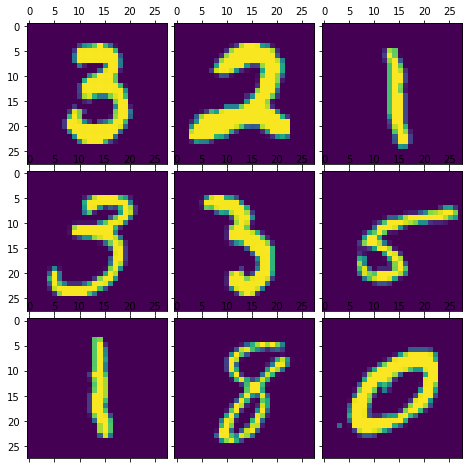

[[ 3.  2.  1.]
 [ 3.  3.  5.]
 [ 1.  8.  0.]]


In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
import pprint
import numpy 

fig = plt.figure(1,(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

model.load_state_dict(torch.load('MNIST_MLP.pth'))

output = numpy.zeros(9)
for i, (data, target) in enumerate(test_loader):
    if i < 1:
        
        data1 = data.cuda()
        data1 = data1.view(data.size()[0], -1)
        out = model(Variable(data1))
        #data = data.view(data.size()[0], -1)
        for j in range(9):
            
            grid[j].matshow(Image.fromarray(data[j][0].numpy()))
            output[j] = out.data.max(1)[1][j].cpu().numpy()[0]
            
    else:
        break
            
output = output.reshape(3,3)
plt.show()
print(output)